In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
!pip install keras --user


     |████████████████████████████████| 317kB 20kB/s eta 0:00:011     |████████████▋                   | 122kB 8.1kB/s eta 0:00:24
     |████████████████████████████████| 2.8MB 42kB/s eta 0:00:011     |██████████████▍                 | 1.3MB 44kB/s eta 0:00:36
     |████████████████████████████████| 51kB 10kB/s  eta 0:00:02
     |████████████████████████████████| 51kB 39kB/s eta 0:00:01


In [5]:
!pip install tensorflow --user


     |████████████████████████████████| 92.5MB 44kB/s  eta 0:00:01    |▉                               | 2.3MB 103kB/s eta 0:14:32     |▉                               | 2.5MB 103kB/s eta 0:14:30     |█                               | 2.6MB 103kB/s eta 0:14:29     |███▍                            | 9.9MB 135kB/s eta 0:10:12     |████▏                           | 12.0MB 162kB/s eta 0:08:16     |████▎                           | 12.4MB 193kB/s eta 0:06:54     |█████                           | 14.7MB 299kB/s eta 0:04:21     |████████                        | 23.0MB 401kB/s eta 0:02:53     |█████████▉                      | 28.4MB 729kB/s eta 0:01:28     |██████████▊                     | 31.0MB 366kB/s eta 0:02:48     |███████████                     | 31.9MB 304kB/s eta 0:03:20     |███████████▍                    | 32.9MB 340kB/s eta 0:02:56     |█████████████▏                  | 38.0MB 287kB/s eta 0:03:10     |█████████████▌                  | 38.9MB 334kB/s eta 0:02:41     |█████████

In [33]:
import tensorflow as tf




In [34]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

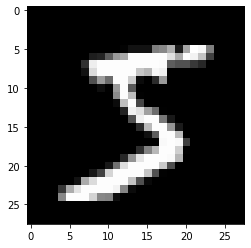

In [36]:
plt.imshow(x_train[0],cmap='gray')

In [37]:
x_train.shape

(60000, 28, 28)

In [38]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [40]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [41]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
60000/60000 [==============================] - 168s 3ms/step - loss: 0.2039 - acc: 0.9384
Epoch 2/10
60000/60000 [==============================] - 156s 3ms/step - loss: 0.0836 - acc: 0.9739
Epoch 3/10
60000/60000 [==============================] - 150s 2ms/step - loss: 0.0565 - acc: 0.9822
Epoch 4/10
60000/60000 [==============================] - 158s 3ms/step - loss: 0.0432 - acc: 0.9861
Epoch 5/10
60000/60000 [==============================] - 139s 2ms/step - loss: 0.0336 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0280 - acc: 0.9906
Epoch 7/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0248 - acc: 0.9919
Epoch 8/10
60000/60000 [==============================] - 116s 2ms/step - loss: 0.0228 - acc: 0.9921
Epoch 9/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0185 - acc: 0.9937
Epoch 10/10
60000/60000 [==================

In [42]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 17s 2ms/step


[0.059197091972323326, 0.9853]

9


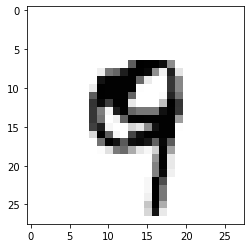

In [46]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())